# Analysis of number of concatenations, $m$

In [20]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn
from scipy.optimize import fsolve

import main_1GnB as main

---
---
## Fixed $q$

In [24]:
n = 10

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 1
pur_after_swap = False

# NOISE
Gamma = 0.2#0.02

# CONS
p_cons = 0.1

# Experiment
max_concatenations = 10
savefig = True

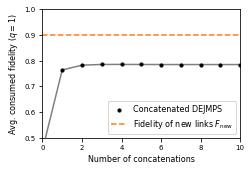

In [25]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [0 for m in range(max_concatenations+1)]

for m in range(max_concatenations+1):
    if m==0:
        policy_name = 'Identity'
    else:
        policy_name = 'Concat. DEJMPS x%d'%m
    purif_policy = main.policy_label_to_function(policy_name)
    
    A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                  purif_policy, pur_after_swap, Gamma, p_cons)
    Fcons_theory_vec[m] = Fcons

## PLOT ##
xfig = 9
yfig = 6
fontsize_labels = 8
fig, ax = plt.subplots(figsize=(xfig/2.54, yfig/2.54))
    
plt.scatter(range(max_concatenations+1), Fcons_theory_vec, s=10, color='k',
            label=r'Concatenated DEJMPS')
plt.plot(range(max_concatenations+1), Fcons_theory_vec, color='k', linestyle='-', alpha=0.5)
plt.plot([0,max_concatenations], [F_new, F_new], color='tab:orange', linestyle='--',
         label=r'Fidelity of new links $F_\mathrm{new}$')

## Plot specs ##
plt.legend(fontsize=fontsize_labels)
plt.xlabel(r'Number of concatenations', fontsize=fontsize_labels)
plt.ylabel(r'Avg. consumed fidelity ($q=%.f$)'%q_purif, fontsize=fontsize_labels)
ax.tick_params(labelsize=fontsize_labels-1)
    
plt.xlim([0,max_concatenations])
#plt.ylim([0.78, 0.95])
plt.ylim([0.5, 1])
#ax.set_yticks(np.arange(0.8,0.95*1.0001,0.05))
ax.set_yticks(np.arange(0.5,1*1.0001,0.1))


if savefig:
    filename = 'figs/concatDEJMPS-q%.3f-n%d-pg%.3f-rho00%.3f-rho11%.3f-rho22%.3f-Gamma%.3f-pc%.3f.pdf'%(q_purif,
                n, p_gen, rho_new[0][0], rho_new[1][1], rho_new[2][2], Gamma, p_cons)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

---
### CONCLUSIONS:
 1. x2 is the best when there is not much noise (e.g., $\Gamma = 1/50$ and $n = 10$, $p_\mathrm{gen}=0.5$, $F_\mathrm{new}=0.9$, $\rho_\mathrm{new} = \mathrm{diag}(F_\mathrm{new}, (1-F_\mathrm{new})/3, (1-F_\mathrm{new})/3, (1-F_\mathrm{new})/3)$, $q=1$, $p_\mathrm{cons}=0.1$).
 2. The avg. cons. fidelity is not maximized for x2 when there is a lot of noise (e.g., $\Gamma=1$ and same parameters as above).

---
---
## Same availability $A$

In [7]:
n = 10

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
pur_after_swap = False

# NOISE
Gamma = 0.5

# CONS
p_cons = 0.1

# Experiment
A_min = 0.8
max_concatenations = 10

/Users/alvarogomezinesta/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


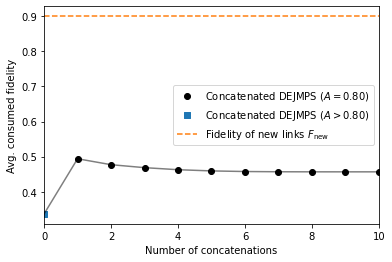

In [8]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [None for m in range(max_concatenations+1)]
Fcons_higherA = [None for m in range(max_concatenations+1)]

for m in range(max_concatenations+1):
    if m==0:
        policy_name = 'Identity'
    else:
        policy_name = 'Concat. DEJMPS x%d'%m
    purif_policy = main.policy_label_to_function(policy_name)
    
    f = lambda q: A_min-main.analytical_availability_Fcons(n, p_gen, rho_new, q,
                                                     purif_policy, pur_after_swap, Gamma, p_cons)[0]
    q_sol = fsolve(f, x0=0.5)[0]
    A_sol, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_sol,
                                                  purif_policy, pur_after_swap, Gamma, p_cons)
    if q_sol<0 or q_sol>1 or round(A_sol,3)!=round(A_min,3):
        # Check if A is always larger than A_min
        # If so, take A(q=1)
        A_sol, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, 1,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        if A_sol>A_min:
            Fcons_theory_vec[m] = Fcons
            Fcons_higherA[m] = Fcons
        else:
            pass
    else:
        Fcons_theory_vec[m] = Fcons

## PLOT ##
plt.scatter(range(max_concatenations+1), Fcons_theory_vec, color='k',
            label=r'Concatenated DEJMPS ($A=%.2f$)'%A_min)
plt.scatter(range(max_concatenations+1), Fcons_higherA, color='tab:blue', marker='s',
            label=r'Concatenated DEJMPS ($A>%.2f$)'%A_min)
plt.plot(range(max_concatenations+1), Fcons_theory_vec, color='k', linestyle='-', alpha=0.5)
plt.plot([0,max_concatenations], [F_new, F_new], color='tab:orange', linestyle='--',
         label=r'Fidelity of new links $F_\mathrm{new}$')

plt.xlim([0,max_concatenations])

plt.xlabel(r'Number of concatenations')
plt.ylabel(r'Avg. consumed fidelity')
plt.legend()

if savefig:
    filename = 'figs/concatDEJMPS-A%.3f-n%d-pg%.3f-rho00%.3f-rho11%.3f-rho22%.3f-Gamma%.3f-pc%.3f.pdf'%(A_min,
                n, p_gen, rho_new[0][0], rho_new[1][1], rho_new[2][2], Gamma, p_cons)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

---
### CONCLUSIONS:
 1. x2 is the best when there is not much noise (e.g., $A=0.85$, $\Gamma = 0.01$ and $n = 10$, $p_\mathrm{gen}=0.5$, $F_\mathrm{new}=0.9$, $\rho_\mathrm{new} = \mathrm{diag}(F_\mathrm{new}, (1-F_\mathrm{new})/3, (1-F_\mathrm{new})/3, (1-F_\mathrm{new})/3)$, $p_\mathrm{cons}=0.1$).
 2. x1 becomes the best sometimes (e.g., $\Gamma = 0.02$ and same parameters as above)